In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

## Analyze Projector Data from projectorcenter.com

I scraped out all the projectors in their database that contain latency data and put them in a csv file.  Let's see what's out there!

In [2]:
df = pd.read_csv('../data/final/projectors.csv')
df.head()

,Name,Input Lag,Aspect Ratio,Audible Noise,Brightness,Contrast,Length,Width,Height,Resolution Width,Resolution Height,Volume,Weight,Price,Release Date,3D,Technology
0,NEC ME331W,44,1.600000,36.0,3300,6000.0,26,34,11,1280,800,9.56,2.9,639.0,1/1/2017,False,LCD
1,ViewSonic PG705HD,16,1.777778,NaN,4000,12000.0,26,33,13,1920,1080,11.69,3.7,799.0,12/20/2017,False,DLP
2,*,32,1.900000,NaN,1500,NaN,46,50,20,4096,2160,44.85,14.1,7999.0,NaN,True,SXRD
3,*,33,1.777778,NaN,300,100000.0,9,11,6,1280,720,0.61,0.4,450.0,NaN,False,DLP
4,ViewSonic PA502S,16,1.333333,NaN,3500,22000.0,21,32,12,800,600,8.24,2.1,289.0,7/15/2017,True,DLP


In [12]:
len(df)

111

# Get All Latencies

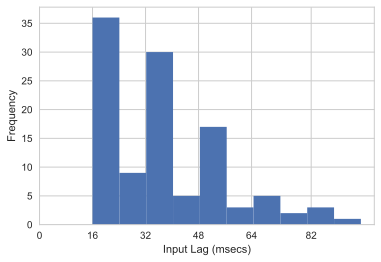

In [11]:
df['Input Lag'].hist(bins=10)
plt.gca().set(
    xlabel='Input Lag (msecs)', 
    ylabel='Frequency',
    xticks=[0, 16, 32, 48, 64, 82],
)
for ext in ['.svg', '.png']:
    plt.gcf().savefig('../figures/latency_histogram'.format(ext))


None of the reported latencies are above one 60-Hz frame.

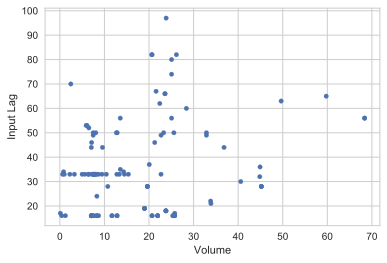

In [4]:
df.plot.scatter(x='Volume', y='Input Lag')

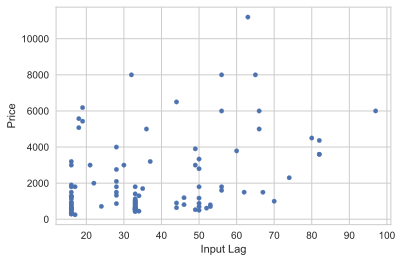

In [14]:
df.plot.scatter(x='Input Lag', y='Price')

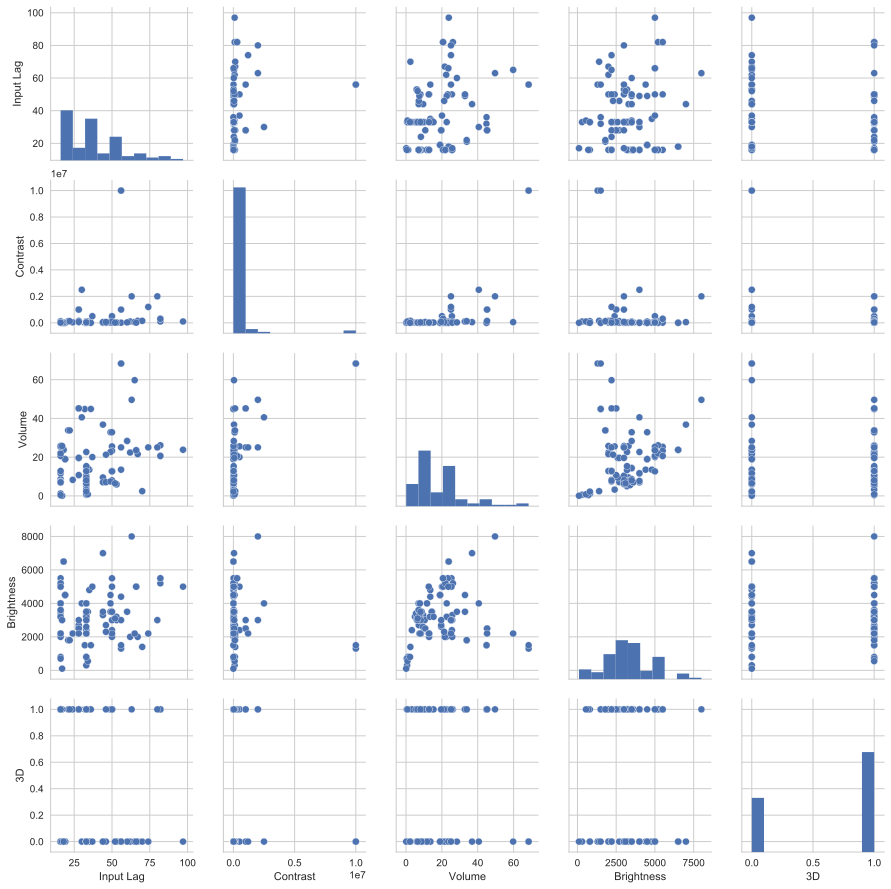

In [5]:
sns.pairplot(df.fillna(0), vars=['Input Lag', 'Contrast', 'Volume', 'Brightness', '3D'])

In [6]:
best_df = df.sort_values(['Input Lag', '3D', 'Resolution Width', 'Price', 'Contrast'], ascending=[True, False, False, True, False])
best_df.head(10)

,Name,Input Lag,Aspect Ratio,Audible Noise,Brightness,Contrast,Length,Width,Height,Resolution Width,Resolution Height,Volume,Weight,Price,Release Date,3D,Technology
43,ViewSonic PJD7720HD,16,1.777778,35.0,3200,22000.0,23,31,10,1920,1080,7.50,2.4,529.0,7/1/2016,True,DLP
38,ViewSonic PJD7828HDL,16,1.777778,35.0,3200,22000.0,23,31,10,1920,1080,7.50,2.4,589.0,2/1/2016,True,DLP
108,BenQ HT2050A,16,1.777778,29.0,2200,15000.0,28,38,12,1920,1080,12.86,3.3,749.0,2/5/2018,True,DLP
104,BenQ HT2150ST,16,1.777778,29.0,2200,15000.0,28,38,12,1920,1080,12.78,3.6,899.0,8/1/2016,True,DLP
10,ViewSonic PG800HD,16,1.777778,NaN,5000,5000.0,31,47,14,1920,1080,20.68,6.2,1249.0,11/8/2017,True,DLP
78,ViewSonic PX800HD,16,1.777778,NaN,2000,100000.0,39,43,15,1920,1080,25.77,6.1,1299.0,3/29/2017,True,DLP
76,ViewSonic Pro8530HDL,16,1.777778,33.0,5200,5000.0,32,50,14,1920,1080,21.94,6.3,1799.0,6/1/2016,True,DLP
15,ViewSonic Pro8800WUL,16,1.600000,33.0,5200,5000.0,32,50,14,1920,1200,21.94,6.3,1899.0,4/1/2017,True,DLP
77,ViewSonic LS800HD,16,1.777778,NaN,5000,100000.0,44,36,16,1920,1080,25.37,11.0,2999.0,1/10/2018,True,DLP
14,ViewSonic LS800WU,16,1.600000,NaN,5500,100000.0,44,36,16,1920,1200,25.37,11.0,3199.0,1/10/2018,True,DLP


In [7]:
best_df.to_html('../reports/best_vr_projectors_sorted.html')